In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

base_model = DecisionTreeClassifier(max_depth=1, random_state=42)
base_model.fit(X_train, y_train)

adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   random_state=42)

                 Model  Accuracy   ROC AUC
0  Decision Tree Stump  0.894737  0.897150
1  AdaBoost Classifier  0.964912  0.958074


C:\Users\kavip\AppData\Local\Temp\ipykernel_77796\1153878095.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comparison["Model"], y=comparison["Accuracy"], palette="Blues")


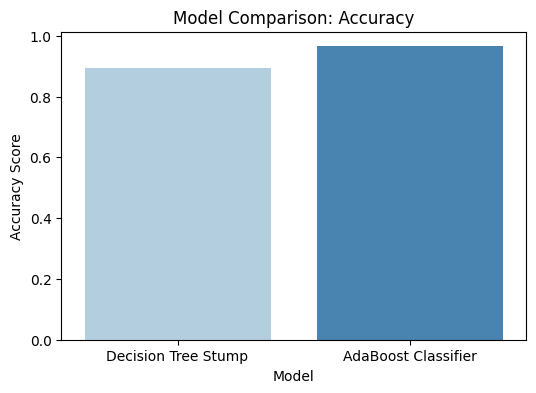

In [2]:
y_pred_base = base_model.predict(X_test)
y_pred_adaboost = adaboost_model.predict(X_test)

accuracy_base = accuracy_score(y_test, y_pred_base)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
roc_auc_base = roc_auc_score(y_test, y_pred_base)
roc_auc_adaboost = roc_auc_score(y_test, y_pred_adaboost)

comparison = pd.DataFrame({
    "Model": ["Decision Tree Stump", "AdaBoost Classifier"],
    "Accuracy": [accuracy_base, accuracy_adaboost],
    "ROC AUC": [roc_auc_base, roc_auc_adaboost]
})

print(comparison)

plt.figure(figsize=(6, 4))
sns.barplot(x=comparison["Model"], y=comparison["Accuracy"], palette="Blues")
plt.title("Model Comparison: Accuracy")
plt.ylabel("Accuracy Score")
plt.show()